The aim of this project is to use a simple dataset that reflects the type of population health analytics that we will want to do in Discover-NOW.

The project will seek to answer three questions:
    1. Does age play a role in stroke incidence?
    2. Is hypertension more likely to lead to strokes?
    3. Can we predict who is likely to have a stroke based on their characteristics in the dataset?

In [233]:
#Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, plot_confusion_matrix
import sklearn.metrics as metrics
from pywaffle import Waffle
from sklearn.svm import SVC
import missingno as msno
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

## read in data
df = pd.read_csv('C:/Users/mchisambi/GoogleDrive/udadatasci/stroke-data.csv')

Data wrangling steps:
1. Review missing data. BMI is the only category that has missing data.

c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


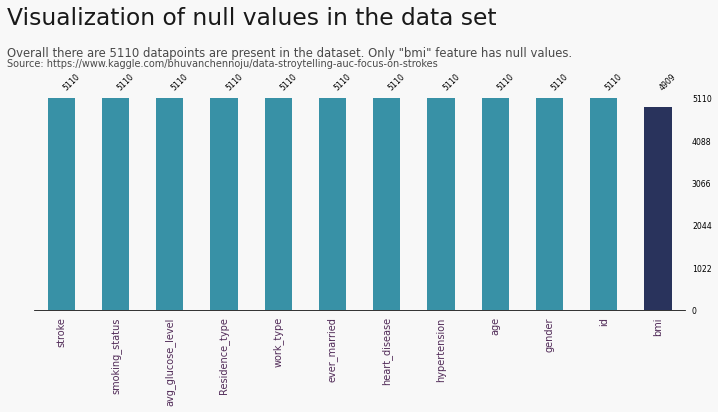

In [234]:
#df.info() #great for missing data
color = ['#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#3891a6','#29335c']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#F8F8F8')
ax.set_facecolor('#F8F8F8')


msno.bar(df, sort = 'descending',
         color = color,
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of null values in the data set',{'font': 'Helvetica', 'Size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 5110 datapoints are present in the dataset. Only "bmi" feature has null values.',{'font': 'Helvetica', 'Size': 12,  'color':'black'}, alpha = 0.7)
ax.text(-1,1.15, 'Source: https://www.kaggle.com/bhuvanchennoju/data-stroytelling-auc-focus-on-strokes',{'font': 'Helvetica', 'Size': 10,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,
                   ha = 'center', **{'font': 'Helvetica', 'Size': 10,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

# fig.show()

2. An alternative visualisation is using the matrix function

c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


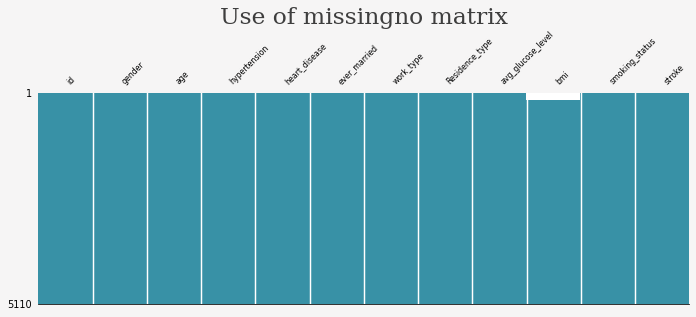

In [235]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

msno.matrix(df, sort='ascending',
            sparkline=False, ax = ax,
            fontsize=8, labels='off',
            filter="top", color=(56/255,145/255,166/255))

ax.set_title('Use of missingno matrix',{'font': 'Serif', 'Size': 24,  'color':'black'},alpha = 0.75)

ax.spines['bottom'].set_visible(True)
# fig.show()

3. Replace the missing BMI values with the mean. Chose to use fillna because I wanted to: preserve data integrity; maintain consistency; prevent biased analysis and avoid problems with downstream processes

c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


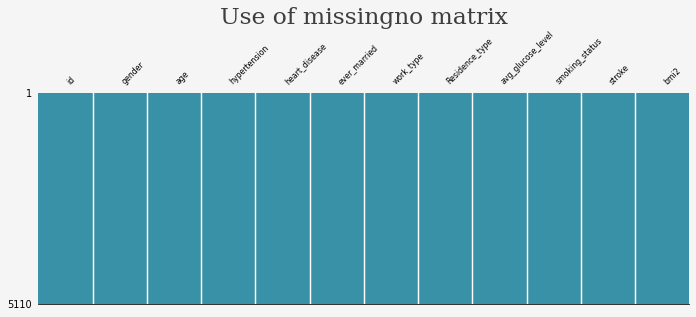

In [236]:
#subset
df['bmi2'] = df['bmi'].fillna(df['bmi'].mean())
df = df.drop(['bmi'], axis=1)
# msno.matrix(df, sort='ascending',
#             sparkline=False, ax = ax,
#             fontsize=8, labels='off',
#             filter="top", color=(0.1,0.1,0.5))
#
# fig.show()

fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

msno.matrix(df, sort='ascending',
            sparkline=False, ax = ax,
            fontsize=8, labels='off',
            filter="top", color=(56/255,145/255,166/255))

ax.set_title('Use of missingno matrix',{'font': 'Serif', 'Size': 24,  'color':'black'},alpha = 0.75)

ax.spines['bottom'].set_visible(True)
# fig.show()

3. Review data, initially continuous variables


c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


,id,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi2
count,5110.00,5110.00,5110.0,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,0.05,28.89
std,21161.72,22.61,0.3,0.23,45.28,0.22,7.70
min,67.00,0.08,0.0,0.00,55.12,0.00,10.30
25%,17741.25,25.00,0.0,0.00,77.24,0.00,23.80
50%,36932.00,45.00,0.0,0.00,91.88,0.00,28.40
75%,54682.00,61.00,0.0,0.00,114.09,0.00,32.80
max,72940.00,82.00,1.0,1.00,271.74,1.00,97.60


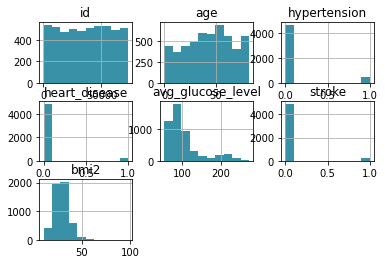

In [237]:
df.hist()
round (df.describe(exclude = 'object'), 2)


4. Then, categorical variables

In [238]:
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


5. Create bins for some of the continuous values

In [239]:
df['bmi_cat'] = pd.cut(df['bmi2'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,20,40,60,80,200], labels = ['0-20','21-40','41-60','61-80','80+' ])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   smoking_status  \
0           Private          Urban             228.69  formerly smoked   

6. Establish colour palette for consistency.

<Figure size 720x360 with 0 Axes>

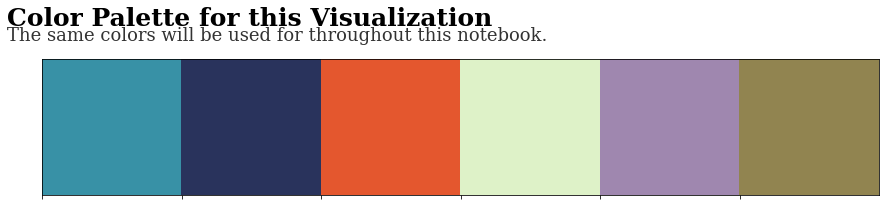

In [240]:
colors = ['#3891a6','#29335c', '#E4572E', '#def2c8', '#9f87af', '#918450']
palette = sns.color_palette(palette = colors)
customPalette = sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize = (12,6), dpi = 60)
sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'The same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()

****DATA WRANGLING COMPLETE****
~~~~~~~
Now to address the three questions:
1. Does age play a role in stroke incidence?
2. Is hypertension more likely to lead to strokes?
3. Can we predict who is likely to have a stroke based on their characteristics in the dataset?

~~~~~~~
**QUESTION 1: Does age play a role in stroke incidence?**
1a) Review the overall coelations in the dataset.

Text(0.25, 1, 'Age is positively associated with several conditions')

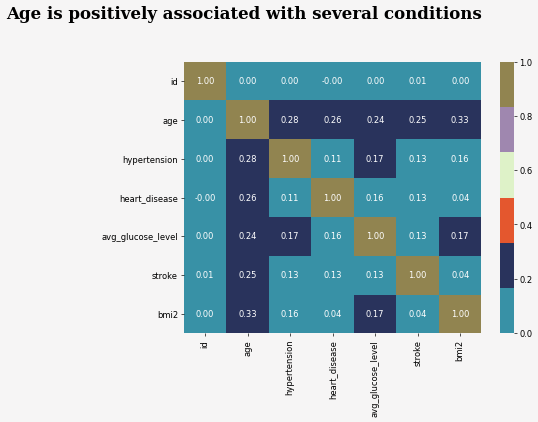

In [241]:
fig = plt.figure(figsize = (8,6), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
sns.heatmap(df.corr(), annot=True,fmt='.2f',robust=True, cmap=colors, linecolor='black')
fig.text(0.25,1,'Age is positively associated with several conditions',{'font':'Serif', 'weight':'bold','ha':'center', 'color': 'black', 'size':20})

1b) Age is clearly positively associated with several other continuous variables (bmi, stroke, avg_glucose_level, heart_disease, hypertension)
1c) The positive association with stroke can be visualised as follows:

c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()


Text(0.25, 1, 'The number of strokes increases with age')

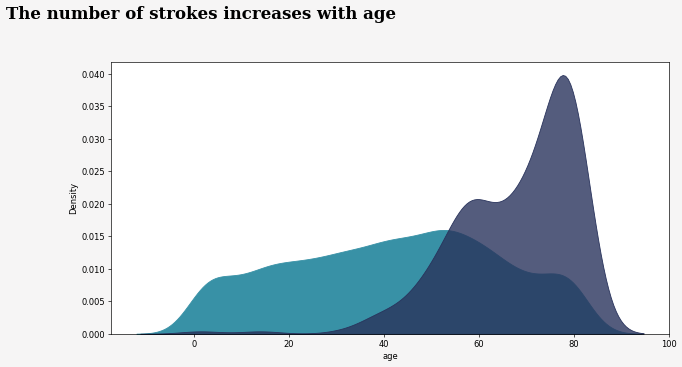

In [242]:
#plot
fig = plt.figure(figsize = (12,6), dpi = 60)
gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)
fig.patch.set_facecolor('#f6f5f5')

sns.kdeplot(data = df[df['stroke'] == 0], x = 'age', shade = True,  alpha = 1, color = colors[0] )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age', shade = True, alpha = 0.8, color = colors[1])

ax.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1,'The number of strokes increases with age',{'font':'Serif', 'weight':'bold','color': 'black', 'ha': 'center', 'size':20})


<Figure size 720x360 with 0 Axes>

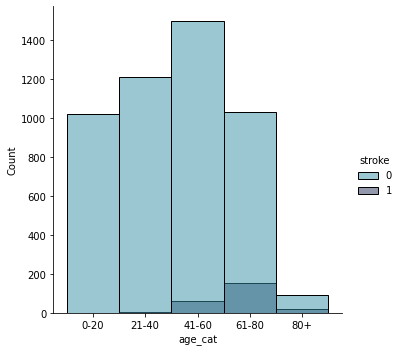

In [243]:
plt.figure(figsize = (12,6), dpi = 60)
sns.displot(df, x='age_cat', hue='stroke', palette=customPalette)

**QUESTION 2: Is hypertension more likely to lead to strokes?**

2a) A simple plot of the poportion of patients who have stroke based on their hypertension status.

c:\users\mchisambi\googledrive\udadatasci\venv\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


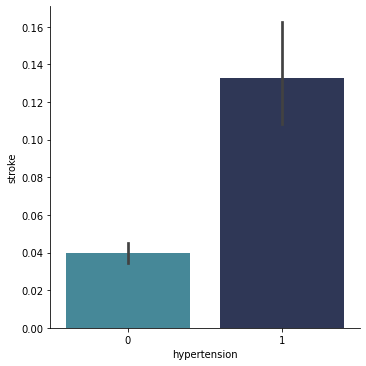

In [244]:
sns.factorplot(data = df, x = 'hypertension', y='stroke', kind='bar')
# sns.factorplot(data = df, x = 'heart_disease', y='stroke', kind='bar')


2b) Odds Ratio estimate of stroke if a patient has hypertension is positive and statistically significant.

In [245]:
table = pd.crosstab(df['hypertension'], df['stroke'])
oddsratio, oddsratio_confint = stats.fisher_exact(table)
print(table)
print("OddsR: ", oddsratio, "p-Value:", oddsratio_confint)


stroke           0    1
hypertension           
0             4429  183
1              432   66
OddsR:  3.697556162720097 p-Value: 4.5491818657666844e-15


**QUESTION 3: Can I predict whether someone will have a stroke or not using certain variables?**

For this question, I will be using support vector classification, as we are trying to predict a categorical variable.

3a) Create new dataset with categorical data dummies

In [246]:
#dummy_df = pd.get_dummies(df)
df_drop = df.drop(['id', 'bmi_cat', 'age_cat', 'glucose_cat'], axis=1)
df_pred = pd.get_dummies(df_drop)
#create a subset
print(df.columns)
print(df_drop.columns)
print(df_pred.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status',
       'stroke', 'bmi2', 'bmi_cat', 'age_cat', 'glucose_cat'],
      dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status',
       'stroke', 'bmi2'],
      dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke',
       'bmi2', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


3b) Create training and testing dataset

In [247]:
print(df_pred.columns)
X = df_pred.drop(['stroke'], axis=1)
y = df_pred['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke',
       'bmi2', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [248]:
SVM_Model = SVC(gamma='auto')
SVM_Model.fit(X_train,y_train)

predicted = SVM_Model.predict(X_test)

3d) Evaluate the model

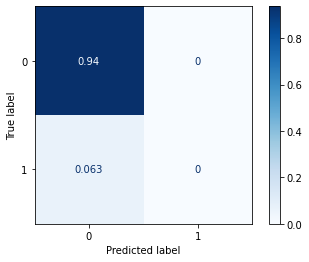

In [249]:
metrics.accuracy_score(y_test, predicted)
metrics.confusion_matrix(y_test, predicted)

plot_confusion_matrix(SVM_Model, X_test, y_test, cmap='Blues', normalize='pred')